In [1]:
from scLENS2 import scLENS2
import pandas as pd
import cupy
import scanpy as sc

In [2]:
df = pd.read_csv('../Z8eq.csv')
df

,cell,ENSG00000237683,Unknown,LINC01409,LINC00115,NOC2L,KLHL17,PLEKHN1,HES4,ISG15,...,MT-ND6,MT-CYB,ENSG00000215750,ENSG00000215781,ENSG00000220023,ENSG00000212884,ENSG00000215615,ENSG00000215764,ENSG00000215700,ENSG00000215699
0,b.cells,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,b.cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b.cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,b.cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,b.cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3989,naive.t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3990,naive.t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3991,naive.t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3992,naive.t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 세포 정보 추출 (cell 열)
obs = pd.DataFrame(df['cell']) 

# 유전자 발현 데이터 추출 (두 번째 열부터)
X = df.iloc[:, 1:].values 

# 유전자 메타데이터 생성 (열 이름 사용)
var = pd.DataFrame(df.columns[1:])
var.columns = ['gene'] 

# AnnData 객체 생성
adata = sc.AnnData(X, obs=obs, var=var)

/home/l202255179/micromamba/envs/ssam_thymus/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/l202255179/micromamba/envs/ssam_thymus/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [4]:
adata

AnnData object with n_obs × n_vars = 3994 × 15716
    obs: 'cell'
    var: 'gene'

In [5]:
sclens = scLENS2()

Removed 0 cells and 6065 genes in QC


,0,1,2,3,4,5,6,7,8,9,...,9641,9642,9643,9644,9645,9646,9647,9648,9649,9650
0,-0.044934,-0.062198,-0.209793,-0.043851,-0.368539,-0.069993,-0.168066,-0.220861,-0.292073,-0.102178,...,0.231515,-0.418632,-0.190431,-1.186235,0.670653,-0.124937,-0.048116,-0.088426,-0.159877,-0.157711
1,-0.042238,-0.059163,-0.199871,-0.041283,-0.351399,-0.066732,-0.160528,-0.211594,-0.278417,-0.097402,...,-0.286114,-0.398653,-0.181469,2.157507,-0.621006,-0.119329,-0.402167,-0.084440,-0.152899,-0.150666
2,-0.052136,-0.070308,-0.236299,-0.050714,-0.414334,-0.078705,-0.188206,-0.245621,-0.328557,-0.114938,...,0.029885,0.980972,-0.214374,-0.490339,1.307129,-0.139919,-0.016495,-0.099075,-0.178519,-0.176534
3,-0.023987,-0.038613,-0.132701,-0.023893,-0.235351,-0.044656,-0.109491,-0.148849,-0.185963,-0.065066,...,1.984730,3.336652,-0.120796,1.303600,0.841937,-0.081361,3.676373,-0.057453,-0.105656,-0.102967
4,-0.040228,-0.056900,-0.192474,-0.039368,-0.338618,-0.064301,-0.154907,-0.204684,-0.268235,-0.093841,...,0.637706,1.444227,-0.174788,0.488128,-0.598966,-0.115147,0.499803,-0.081468,-0.147696,-0.145413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3989,-0.044528,-0.061742,-0.208300,-0.043465,-0.365961,-0.069503,-0.166932,-0.219467,-0.290019,-0.101460,...,-0.279448,2.817029,-0.189083,0.686306,0.487506,-0.124093,-0.185954,-0.087826,-0.158827,-0.156651
3990,-0.051094,-0.069135,-0.232464,-0.049721,-0.407708,-0.077444,-0.185292,-0.242039,-0.323278,-0.113092,...,0.384867,-0.464289,-0.210909,-0.789162,-0.718114,-0.137752,0.282587,-0.097535,-0.175822,-0.173810
3991,-0.040217,-0.056888,-0.192435,-0.039358,-0.338552,-0.064288,-0.154878,-0.204647,-0.268182,-0.093822,...,0.567729,-0.383678,-0.174753,-0.248832,1.451453,-0.115126,-0.192871,-0.081453,-0.147669,-0.145385
3992,-0.036994,-0.053258,-0.180571,-0.036286,2.054767,-0.060389,-0.145863,-0.193565,-0.251852,-0.088111,...,-1.062687,-0.359785,-0.164036,-1.029085,-0.563502,-0.108419,0.270166,-0.076686,-0.139324,-0.136960


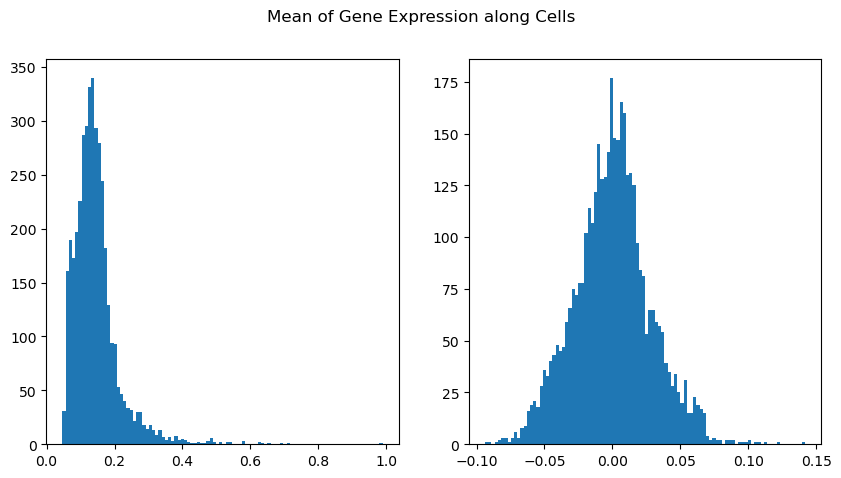

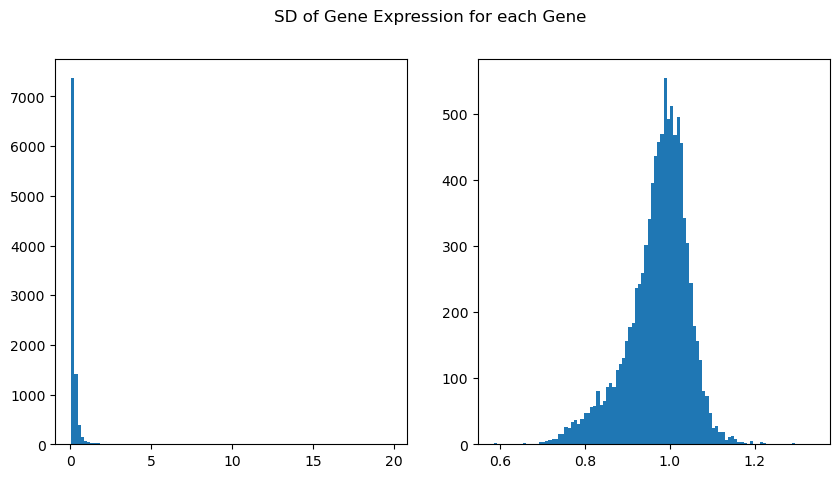

In [6]:
sclens.preprocess(adata, plot = True)

In [ ]:
adata

Max interactions exceeded!
Number of signal components: 16
L_mp type: <class 'cupy.ndarray'>
L_mp shape: (3975,)


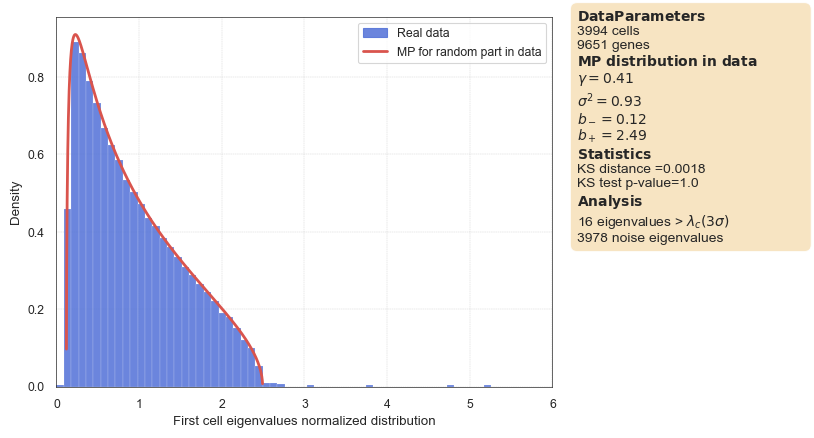

sparsity_th: 0.060047158836727066
Min(corr): 0.0940357215961907, sparsity: 0.999, add_ilen: (38546,)
Min(corr): 0.07625027445121493, sparsity: 0.998, add_ilen: (77092,)
Min(corr): 0.0691429280562985, sparsity: 0.997, add_ilen: (115638,)
Min(corr): 0.0639764023974784, sparsity: 0.996, add_ilen: (154184,)
Min(corr): 0.06319402650114929, sparsity: 0.995, add_ilen: (192730,)
Min(corr): 0.06111626908583445, sparsity: 0.994, add_ilen: (231276,)
Min(corr): 0.05889203644796448, sparsity: 0.993, add_ilen: (269822,)
Min(corr): 0.05830936089976173, sparsity: 0.992, add_ilen: (308368,)
Min(corr): 0.0581068393860498, sparsity: 0.991, add_ilen: (346914,)
Min(corr): 0.05656757903345455, sparsity: 0.99, add_ilen: (385460,)
Min(corr): 0.05663115322012627, sparsity: 0.989, add_ilen: (424007,)


  0%|          | 0/20 [00:00<?, ?it/s]

CPU Memory Usage: 3537.79 MB
(659.56298828125, 3137.72216796875)


In [7]:
X_transform = sclens.fit_transform(plot_mp=True)

In [8]:
X_transform

array([[-0.03826169, -0.02644869,  0.04044216, ..., -0.14582109,
         0.06994112, -0.02711196],
       [-0.00069116, -0.02015234,  0.02560884, ..., -0.13098915,
         0.07156501, -0.03700359],
       [ 0.00759813, -0.02913346, -0.01168169, ..., -0.13624159,
         0.05192215, -0.0357052 ],
       ...,
       [ 0.00800009,  0.00269003,  0.00197925, ...,  0.02358551,
        -0.06861508,  0.0384025 ],
       [-0.01079739,  0.00910996, -0.0051903 , ...,  0.02328334,
        -0.00856293, -0.05428069],
       [ 0.03640545,  0.01290544, -0.02773451, ...,  0.03067032,
        -0.01833608, -0.08521219]])

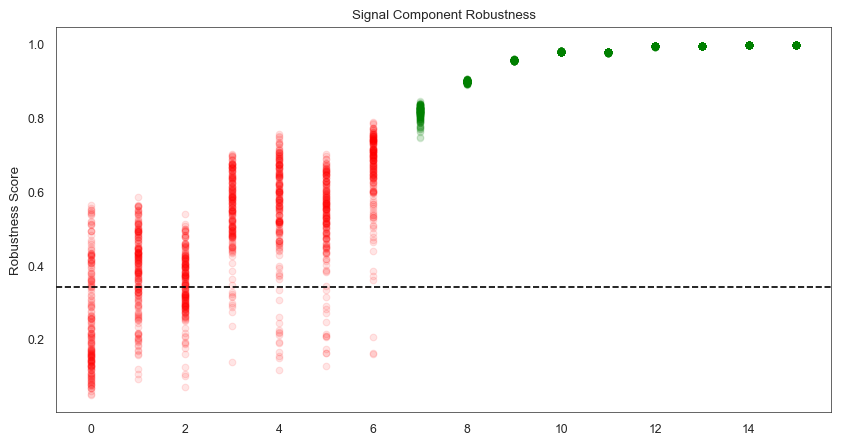

In [9]:
sclens.plot_robust_score()

In [10]:
sclens._signal_components.shape

(3994, 16)

In [11]:
# pca 끝난 결과
adata

AnnData object with n_obs × n_vars = 3994 × 15716
    obs: 'cell'
    var: 'gene'
    uns: 'preprocess_mean_plot', 'preprocess_sd_plot', 'robust_score_plot'
    obsm: 'PCA_scLENS'

In [12]:
adata.obsm['PCA_scLENS']

array([[-0.03826169, -0.02644869,  0.04044216, ..., -0.14582109,
         0.06994112, -0.02711196],
       [-0.00069116, -0.02015234,  0.02560884, ..., -0.13098915,
         0.07156501, -0.03700359],
       [ 0.00759813, -0.02913346, -0.01168169, ..., -0.13624159,
         0.05192215, -0.0357052 ],
       ...,
       [ 0.00800009,  0.00269003,  0.00197925, ...,  0.02358551,
        -0.06861508,  0.0384025 ],
       [-0.01079739,  0.00910996, -0.0051903 , ...,  0.02328334,
        -0.00856293, -0.05428069],
       [ 0.03640545,  0.01290544, -0.02773451, ...,  0.03067032,
        -0.01833608, -0.08521219]])

In [13]:
adata.obsm['PCA_scLENS'].shape

(3994, 9)

In [14]:
adata.obsm['PCA_scLENS'] = adata.obsm['PCA_scLENS'].get()
sc.pp.neighbors(adata, use_rep='PCA_scLENS')

2025-01-09 11:01:22.811707: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-09 11:01:22.826730: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-09 11:01:22.844497: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-09 11:01:22.849826: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-09 11:01:22.863161: I tensorflow/core/platform/cpu_feature_guar

In [15]:
# 거리계산 결과
adata

AnnData object with n_obs × n_vars = 3994 × 15716
    obs: 'cell'
    var: 'gene'
    uns: 'preprocess_mean_plot', 'preprocess_sd_plot', 'robust_score_plot', 'neighbors'
    obsm: 'PCA_scLENS'
    obsp: 'distances', 'connectivities'

In [17]:
adata.obsp['connectivities']

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 79506 stored elements and shape (3994, 3994)>

In [18]:
adata.obsp['distances']

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 55916 stored elements and shape (3994, 3994)>

In [19]:
sc.tl.umap(adata)

In [20]:
# umap 결과
adata

AnnData object with n_obs × n_vars = 3994 × 15716
    obs: 'cell'
    var: 'gene'
    uns: 'preprocess_mean_plot', 'preprocess_sd_plot', 'robust_score_plot', 'neighbors', 'umap'
    obsm: 'PCA_scLENS', 'X_umap'
    obsp: 'distances', 'connectivities'

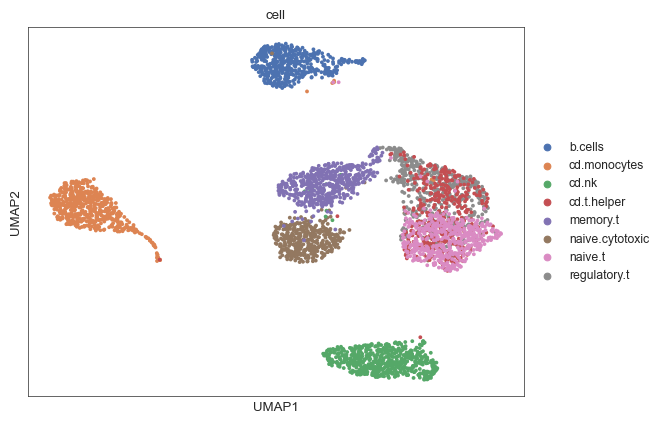

In [21]:
sc.pl.umap(adata, color='cell')

Class 3개로 분류

In [43]:
from scLENS2 import scLENS2
import pandas as pd
import cupy
import scanpy as sc

In [44]:
df = pd.read_csv('../Z8eq.csv')
df

,cell,ENSG00000237683,Unknown,LINC01409,LINC00115,NOC2L,KLHL17,PLEKHN1,HES4,ISG15,...,MT-ND6,MT-CYB,ENSG00000215750,ENSG00000215781,ENSG00000220023,ENSG00000212884,ENSG00000215615,ENSG00000215764,ENSG00000215700,ENSG00000215699
0,b.cells,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,b.cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b.cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,b.cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,b.cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3989,naive.t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3990,naive.t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3991,naive.t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3992,naive.t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# 세포 정보 추출 (cell 열)
obs = pd.DataFrame(df['cell']) 

# 유전자 발현 데이터 추출 (두 번째 열부터)
X = df.iloc[:, 1:].values 

# 유전자 메타데이터 생성 (열 이름 사용)
var = pd.DataFrame(df.columns[1:])
var.columns = ['gene'] 

# AnnData 객체 생성
adata = sc.AnnData(X, obs=obs, var=var)

/home/l202255179/micromamba/envs/ssam_thymus/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/l202255179/micromamba/envs/ssam_thymus/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [57]:
adata

AnnData object with n_obs × n_vars = 3994 × 15716
    obs: 'cell'
    var: 'gene'

In [46]:
sclens = scLENS2()

Removed 0 cells and 6065 genes in QC


,0,1,2,3,4,5,6,7,8,9,...,9641,9642,9643,9644,9645,9646,9647,9648,9649,9650
0,-0.044934,-0.062198,-0.209793,-0.043851,-0.368539,-0.069993,-0.168066,-0.220861,-0.292073,-0.102178,...,0.231515,-0.418632,-0.190431,-1.186235,0.670653,-0.124937,-0.048116,-0.088426,-0.159877,-0.157711
1,-0.042238,-0.059163,-0.199871,-0.041283,-0.351399,-0.066732,-0.160528,-0.211594,-0.278417,-0.097402,...,-0.286114,-0.398653,-0.181469,2.157507,-0.621006,-0.119329,-0.402167,-0.084440,-0.152899,-0.150666
2,-0.052136,-0.070308,-0.236299,-0.050714,-0.414334,-0.078705,-0.188206,-0.245621,-0.328557,-0.114938,...,0.029885,0.980972,-0.214374,-0.490339,1.307129,-0.139919,-0.016495,-0.099075,-0.178519,-0.176534
3,-0.023987,-0.038613,-0.132701,-0.023893,-0.235351,-0.044656,-0.109491,-0.148849,-0.185963,-0.065066,...,1.984730,3.336652,-0.120796,1.303600,0.841937,-0.081361,3.676373,-0.057453,-0.105656,-0.102967
4,-0.040228,-0.056900,-0.192474,-0.039368,-0.338618,-0.064301,-0.154907,-0.204684,-0.268235,-0.093841,...,0.637706,1.444227,-0.174788,0.488128,-0.598966,-0.115147,0.499803,-0.081468,-0.147696,-0.145413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3989,-0.044528,-0.061742,-0.208300,-0.043465,-0.365961,-0.069503,-0.166932,-0.219467,-0.290019,-0.101460,...,-0.279448,2.817029,-0.189083,0.686306,0.487506,-0.124093,-0.185954,-0.087826,-0.158827,-0.156651
3990,-0.051094,-0.069135,-0.232464,-0.049721,-0.407708,-0.077444,-0.185292,-0.242039,-0.323278,-0.113092,...,0.384867,-0.464289,-0.210909,-0.789162,-0.718114,-0.137752,0.282587,-0.097535,-0.175822,-0.173810
3991,-0.040217,-0.056888,-0.192435,-0.039358,-0.338552,-0.064288,-0.154878,-0.204647,-0.268182,-0.093822,...,0.567729,-0.383678,-0.174753,-0.248832,1.451453,-0.115126,-0.192871,-0.081453,-0.147669,-0.145385
3992,-0.036994,-0.053258,-0.180571,-0.036286,2.054767,-0.060389,-0.145863,-0.193565,-0.251852,-0.088111,...,-1.062687,-0.359785,-0.164036,-1.029085,-0.563502,-0.108419,0.270166,-0.076686,-0.139324,-0.136960


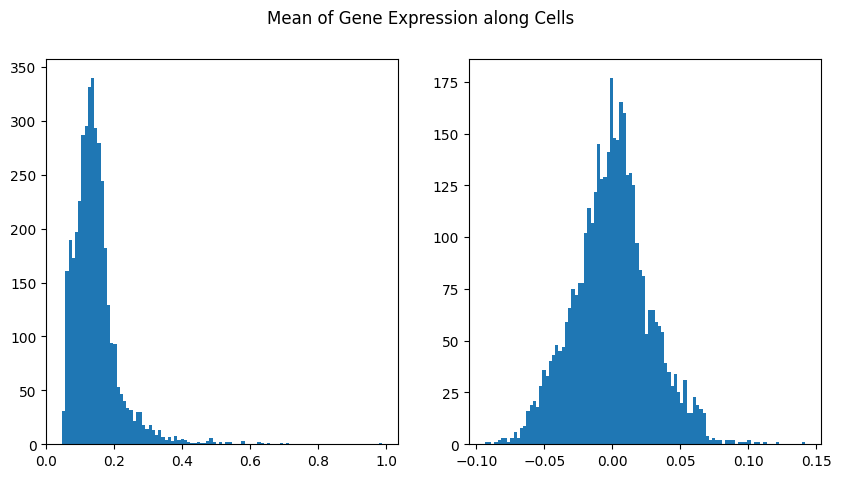

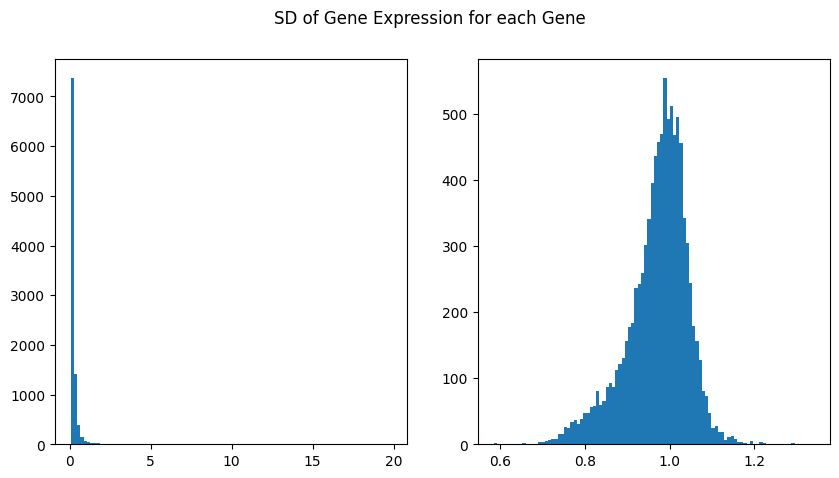

In [58]:
sclens.preprocess(adata, plot = True)

In [59]:
X_transform = sclens.fit_transform(plot_mp=False)

Max interactions exceeded!
Number of signal components: 16


  0%|          | 0/20 [00:00<?, ?it/s]

CPU Memory Usage: 7857.38 MB
(1716.44677734375, 3725.88916015625)


In [60]:
X_transform

array([[ 0.04105718, -0.03826169, -0.02644869, ..., -0.14582109,
         0.06994112, -0.02711196],
       [ 0.02534541, -0.00069116, -0.02015234, ..., -0.13098915,
         0.07156501, -0.03700359],
       [ 0.00774764,  0.00759813, -0.02913346, ..., -0.13624159,
         0.05192215, -0.0357052 ],
       ...,
       [-0.00412252,  0.00800009,  0.00269003, ...,  0.02358551,
        -0.06861508,  0.0384025 ],
       [ 0.02841542, -0.01079739,  0.00910996, ...,  0.02328334,
        -0.00856293, -0.05428069],
       [ 0.01457923,  0.03640545,  0.01290544, ...,  0.03067032,
        -0.01833608, -0.08521219]])

In [61]:
X_transform.shape

(3994, 10)

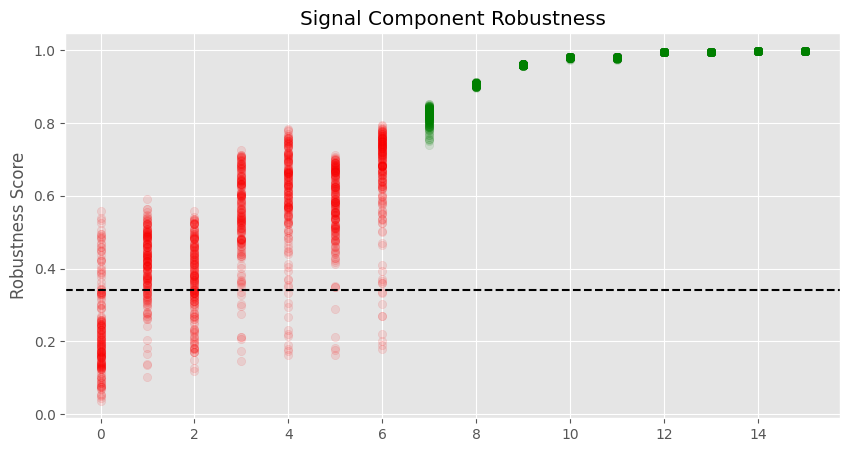

In [9]:
sclens.plot_robust_score()

In [11]:
sclens._signal_components.shape

(3994, 16)

In [62]:
adata

AnnData object with n_obs × n_vars = 3994 × 15716
    obs: 'cell'
    var: 'gene'
    uns: 'preprocess_mean_plot', 'preprocess_sd_plot'
    obsm: 'PCA_scLENS'

In [63]:
adata.obsm['PCA_scLENS'].shape

(3994, 10)

In [64]:
adata.obsm['PCA_scLENS'] = adata.obsm['PCA_scLENS'].get()
sc.pp.neighbors(adata, use_rep='PCA_scLENS')

In [65]:
sc.tl.umap(adata)

In [66]:
adata

AnnData object with n_obs × n_vars = 3994 × 15716
    obs: 'cell'
    var: 'gene'
    uns: 'preprocess_mean_plot', 'preprocess_sd_plot', 'neighbors', 'umap'
    obsm: 'PCA_scLENS', 'X_umap'
    obsp: 'distances', 'connectivities'

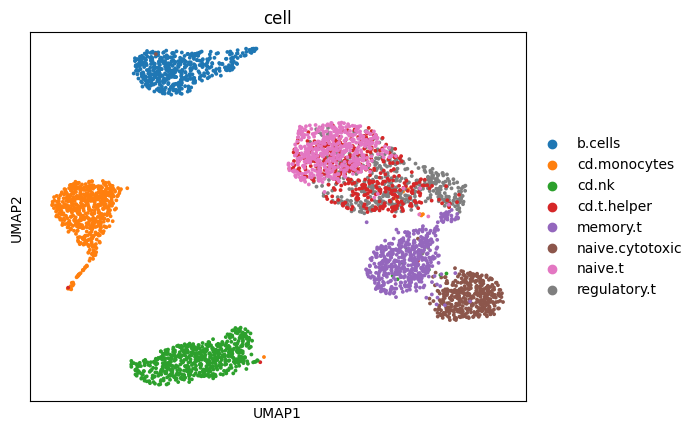

In [67]:
sc.pl.umap(adata, color='cell')

In [84]:
import scvi

In [ ]:
import muon


<module 'scvi' from '/home/l202255179/micromamba/envs/ssam_thymus/lib/python3.11/site-packages/scvi/__init__.py'>